In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('/Users/samarthapc/Documents/college project/college_project-7-sem-/final project/Phishing.csv')


In [4]:
df.head(10)

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1
5,5,1,0,-1,1,1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
6,6,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
7,7,1,0,-1,1,1,-1,1,1,-1,...,1,1,1,-1,1,1,1,0,1,1
8,8,1,1,-1,1,1,-1,-1,1,-1,...,1,1,1,-1,0,-1,1,0,1,-1
9,9,1,1,1,1,1,-1,0,1,1,...,1,1,-1,1,1,1,1,-1,-1,1


In [5]:
df.shape

(11054, 32)

In [6]:
df.columns

Index(['Index', 'UsingIP', 'LongURL', 'ShortURL', 'Symbol@', 'Redirecting//',
       'PrefixSuffix-', 'SubDomains', 'HTTPS', 'DomainRegLen', 'Favicon',
       'NonStdPort', 'HTTPSDomainURL', 'RequestURL', 'AnchorURL',
       'LinksInScriptTags', 'ServerFormHandler', 'InfoEmail', 'AbnormalURL',
       'WebsiteForwarding', 'StatusBarCust', 'DisableRightClick',
       'UsingPopupWindow', 'IframeRedirection', 'AgeofDomain', 'DNSRecording',
       'WebsiteTraffic', 'PageRank', 'GoogleIndex', 'LinksPointingToPage',
       'StatsReport', 'class'],
      dtype='object')

In [7]:
df= df[['UsingIP','LongURL','Symbol@','Redirecting//','PrefixSuffix-','SubDomains','HTTPS','Favicon','HTTPSDomainURL','AnchorURL','InfoEmail','IframeRedirection','AgeofDomain','class']].copy()

In [8]:
df.shape

(11054, 14)

In [9]:
df['class'].value_counts()


class
 1    6157
-1    4897
Name: count, dtype: int64

In [10]:
df.columns


Index(['UsingIP', 'LongURL', 'Symbol@', 'Redirecting//', 'PrefixSuffix-',
       'SubDomains', 'HTTPS', 'Favicon', 'HTTPSDomainURL', 'AnchorURL',
       'InfoEmail', 'IframeRedirection', 'AgeofDomain', 'class'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   UsingIP            11054 non-null  int64
 1   LongURL            11054 non-null  int64
 2   Symbol@            11054 non-null  int64
 3   Redirecting//      11054 non-null  int64
 4   PrefixSuffix-      11054 non-null  int64
 5   SubDomains         11054 non-null  int64
 6   HTTPS              11054 non-null  int64
 7   Favicon            11054 non-null  int64
 8   HTTPSDomainURL     11054 non-null  int64
 9   AnchorURL          11054 non-null  int64
 10  InfoEmail          11054 non-null  int64
 11  IframeRedirection  11054 non-null  int64
 12  AgeofDomain        11054 non-null  int64
 13  class              11054 non-null  int64
dtypes: int64(14)
memory usage: 1.2 MB


In [12]:
df.isnull().sum()

UsingIP              0
LongURL              0
Symbol@              0
Redirecting//        0
PrefixSuffix-        0
SubDomains           0
HTTPS                0
Favicon              0
HTTPSDomainURL       0
AnchorURL            0
InfoEmail            0
IframeRedirection    0
AgeofDomain          0
class                0
dtype: int64

In [13]:
df.corr()

,UsingIP,LongURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,Favicon,HTTPSDomainURL,AnchorURL,InfoEmail,IframeRedirection,AgeofDomain,class
UsingIP,1.000000,-0.052159,0.158766,0.397220,-0.005306,-0.080921,0.071255,0.087093,0.363366,0.099701,0.077746,0.054739,-0.010580,0.094033
LongURL,-0.052159,1.000000,-0.075205,-0.080788,0.055334,0.004249,0.049033,-0.042599,-0.088984,-0.023153,-0.014055,-0.013902,0.179678,0.057661
Symbol@,0.158766,-0.075205,1.000000,0.087086,-0.011711,-0.058931,0.031275,0.304887,0.104672,0.057968,0.370281,0.284401,-0.005459,0.052994
Redirecting//,0.397220,-0.080788,0.087086,1.000000,-0.085709,-0.043401,-0.036536,0.035223,0.760675,-0.005341,0.031416,0.010536,-0.050374,-0.038885
PrefixSuffix-,-0.005306,0.055334,-0.011711,-0.085709,1.000000,0.087852,0.261366,-0.007487,-0.070250,0.348854,-0.045085,-0.036894,0.074083,0.348588
SubDomains,-0.080921,0.004249,-0.058931,-0.043401,0.087852,1.000000,0.267531,-0.016650,-0.037518,0.229374,0.008583,0.010675,0.119144,0.298231
HTTPS,0.071255,0.049033,0.031275,-0.036536,0.261366,0.267531,1.000000,-0.014699,-0.030233,0.535712,0.007801,-0.002734,0.162700,0.714704
Favicon,0.087093,-0.042599,0.304887,0.035223,-0.007487,-0.016650,-0.014699,1.000000,0.049593,0.037757,0.668551,0.627603,-0.002582,-0.000231
HTTPSDomainURL,0.363366,-0.088984,0.104672,0.760675,-0.070250,-0.037518,-0.030233,0.049593,1.000000,0.011589,0.075075,0.017578,-0.049865,-0.040096
AnchorURL,0.099701,-0.023153,0.057968,-0.005341,0.348854,0.229374,0.535712,0.037757,0.011589,1.000000,0.033148,0.013441,0.075393,0.692895


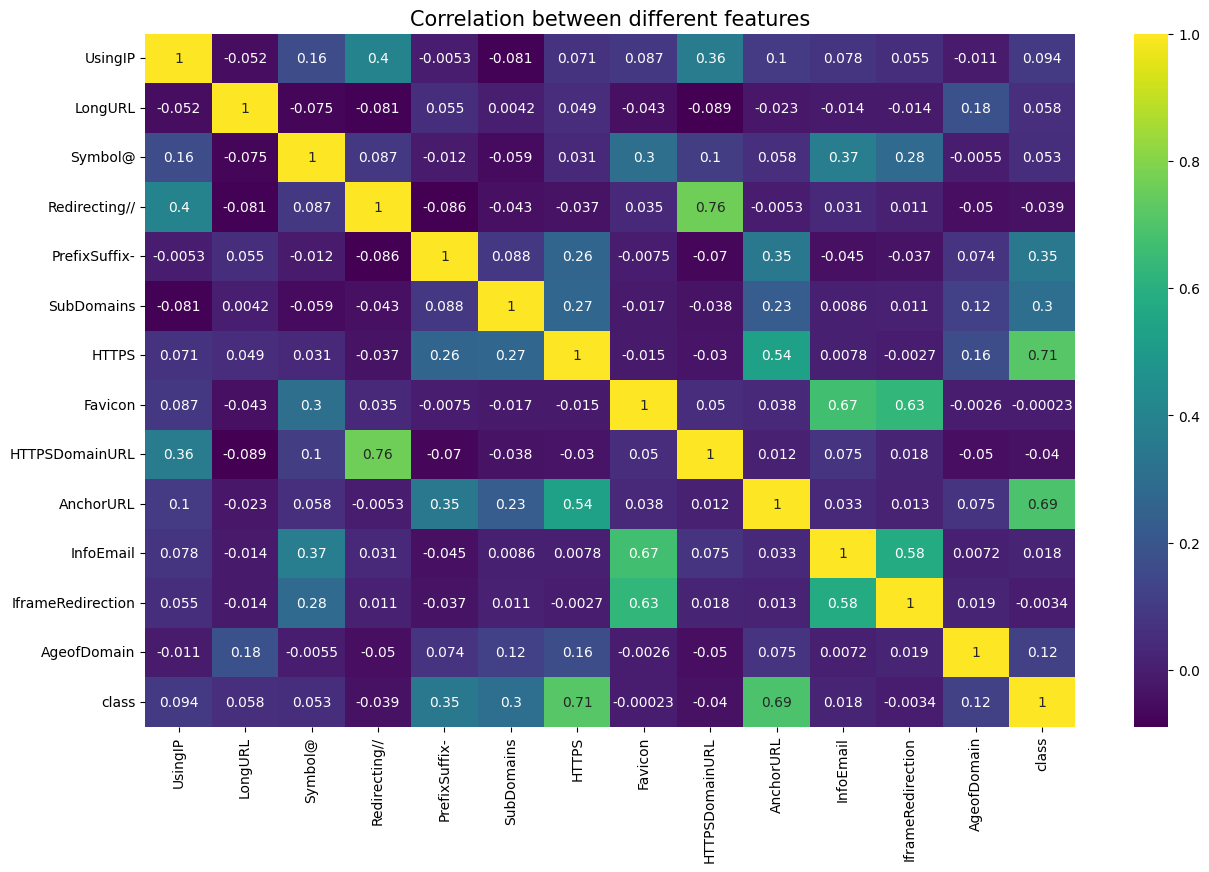

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True,cmap='viridis')
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [15]:
X = df.drop(columns=['class'])
y = df['class']

In [16]:
X.head()

,UsingIP,LongURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,Favicon,HTTPSDomainURL,AnchorURL,InfoEmail,IframeRedirection,AgeofDomain
0,1,1,1,1,-1,0,1,1,-1,0,1,1,-1
1,1,0,1,1,-1,-1,-1,1,-1,0,-1,1,1
2,1,0,1,1,-1,-1,-1,1,-1,0,1,1,-1
3,1,0,1,1,-1,1,1,1,1,0,1,1,-1
4,-1,0,1,-1,-1,1,1,1,-1,0,-1,1,1


In [17]:
y.head()

0   -1
1   -1
2   -1
3    1
4    1
Name: class, dtype: int64

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [19]:
print("train_X : ", X_train.shape)
print("test_X : ", X_test.shape)
print("train_Y : ", y_train.shape)
print("test_Y : ", y_test.shape)

train_X :  (8843, 13)
test_X :  (2211, 13)
train_Y :  (8843,)
test_Y :  (2211,)


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [21]:
dtree = DecisionTreeClassifier()
model = dtree.fit(X_train,y_train)


In [22]:
train_tree = model.predict(X_train)
test_tree = model.predict(X_test)

In [23]:
acc_train_tree = accuracy_score(y_train,train_tree)
acc_test_tree = accuracy_score(y_test,test_tree)
print("Decision Tree : Accuracy on training Data: {:f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 0.938822
Decision Tree : Accuracy on test Data: 0.938489


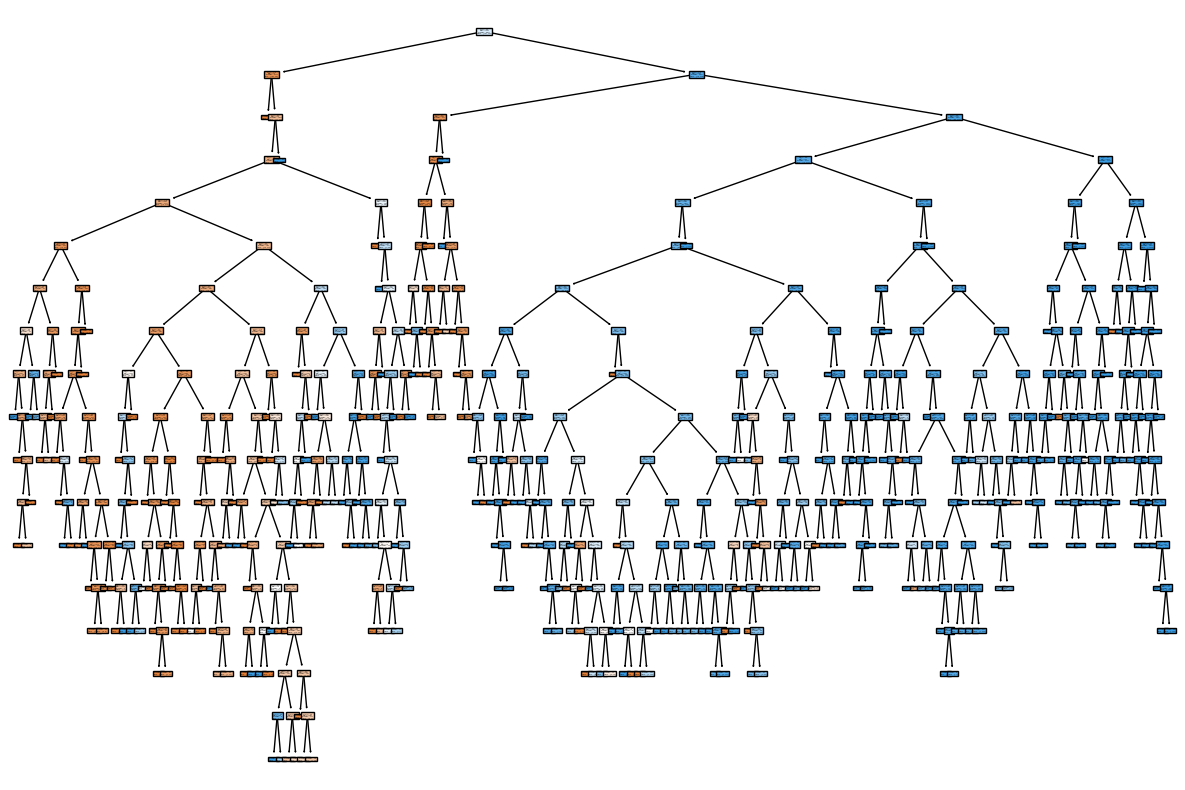

In [24]:
from sklearn import tree

plt.figure(figsize=(15, 10))
tree.plot_tree(model, filled=True)

plt.show()

In [25]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}


In [26]:
svc = GridSearchCV(SVC(), param_grid)
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [27]:
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [28]:
print(accuracy_score(y_train,y_train_svc))
print(accuracy_score(y_test,y_test_svc))

0.9254777790342644
0.9298959746720941


In [29]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)


GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [30]:
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)


In [31]:
print(accuracy_score(y_train,y_train_gbc))
print(accuracy_score(y_test,y_test_gbc))

0.9382562478796789
0.9407507914970602


In [40]:
x=[[ 1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1]]


In [41]:
y_pred =gbc.predict(x)[0]
if y_pred==1:
  print("We guess it is a safe website")
else:
  print("Caution! Suspicious website detected")

We guess it is a safe website


/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
